# GA Data Science 18 (DAT18) - Lab4

## Lab goals

- Simple APIs with Python
- Kimono Labs: an external tool for aquiring data

In [3]:
# Imports at the top
import json
import urllib
import pandas as pd

import requests
import json

#sheetsu means you can get data from a google sheet

## Using Python APIs

### Either Use Sheetsu or an API you've found
Sheetsu: Turning Google Docs into APIs/
https://sheetsu.com/

### Using Sheetsu
I've created a GoogleDoc with wine data

https://docs.google.com/spreadsheets/d/1_U-DHIrBXN8A1e3NbyOIJRORge2udmmaa8qS9mKddWo/edit#gid=0 
https://sheetsu.com/apis/79656330

In [4]:
# You can either post or get info from this API
# using the /column/Name you can pull only specfic subsets of the data
api_base_url = 'https://sheetsu.com/apis/79656330' #base url. every call to that api will use this.
api_column = '/column/Name'


##### Reading Data from an API datafeed

In [5]:
# What kind of data is this returning?
api_response = requests.get(api_base_url) #get me that url. the base url
api_response.text
##This is json

u'{"status":200,"success":true,"result":[{"Color":"W","Region":"Portugal","Country":"Portugal","Vintage":"2013","Vinyard":"Vinho Verde","Name":"","Grape":"","Consumed In":"2015","Score":"4","Price":""},{"Color":"W","Region":"France","Country":"France","Vintage":"2013","Vinyard":"Peyruchet","Name":"","Grape":"","Consumed In":"2015","Score":"3","Price":"17.8"},{"Color":"W","Region":"Oregon","Country":"Oregon","Vintage":"2013","Vinyard":"Abacela","Name":"","Grape":"","Consumed In":"2015","Score":"3","Price":"20"},{"Color":"W","Region":"Spain","Country":"Spain","Vintage":"2012","Vinyard":"Ochoa","Name":"","Grape":"chardonay","Consumed In":"2015","Score":"2.5","Price":"7"},{"Color":"R","Region":"","Country":"US","Vintage":"2012","Vinyard":"Heartland","Name":"Spice Trader","Grape":"chiraz, cab","Consumed In":"2015","Score":"3","Price":"6"},{"Color":"R","Region":"California","Country":"US","Vintage":"2012","Vinyard":"Crow Canyon","Name":"","Grape":"cab","Consumed In":"2015","Score":"3.5","Pri

In [6]:
# What kind of data is this returning?
api_column_url = api_base_url + api_column
column_response = requests.get(api_column_url)
column_response.text

#json

u'{"status":200,"success":true,"result":["","","","","Spice Trader","","#14","","","","Rosso Dei Poggi","Montepulciano D\'Abruzzo","","Rosso Di Montalcino","Sancerre Cuvee Des Moulins Bales","Meiomi","Saint Drezery Prestige","Saint Drezery Prestige","Sauvignon Blanc","Uppercut North Coast","Nero d\'Avola","Cape Blush","Pinot Grigio","Cru Classe","Domaine du Claouset","Sauvignon Blanc","Vinho Verde","Vincent Dampt","Albarino","Dylans Wine"]}'

#### Reading JSON

In [7]:
reponse_dict = json.loads(api_response.text)

#### What is the response of an API and what does it mean??

In [10]:
# What data was returned?
reponse_dict
#now a dictionary, with keys
reponse_dict['result']

#dictionary with a large list, with more dictionaries inside
#a list of keys and what's associated with that. [] list sequence of things

[{u'Color': u'W',
  u'Consumed In': u'2015',
  u'Country': u'Portugal',
  u'Grape': u'',
  u'Name': u'',
  u'Price': u'',
  u'Region': u'Portugal',
  u'Score': u'4',
  u'Vintage': u'2013',
  u'Vinyard': u'Vinho Verde'},
 {u'Color': u'W',
  u'Consumed In': u'2015',
  u'Country': u'France',
  u'Grape': u'',
  u'Name': u'',
  u'Price': u'17.8',
  u'Region': u'France',
  u'Score': u'3',
  u'Vintage': u'2013',
  u'Vinyard': u'Peyruchet'},
 {u'Color': u'W',
  u'Consumed In': u'2015',
  u'Country': u'Oregon',
  u'Grape': u'',
  u'Name': u'',
  u'Price': u'20',
  u'Region': u'Oregon',
  u'Score': u'3',
  u'Vintage': u'2013',
  u'Vinyard': u'Abacela'},
 {u'Color': u'W',
  u'Consumed In': u'2015',
  u'Country': u'Spain',
  u'Grape': u'chardonay',
  u'Name': u'',
  u'Price': u'7',
  u'Region': u'Spain',
  u'Score': u'2.5',
  u'Vintage': u'2012',
  u'Vinyard': u'Ochoa'},
 {u'Color': u'R',
  u'Consumed In': u'2015',
  u'Country': u'US',
  u'Grape': u'chiraz, cab',
  u'Name': u'Spice Trader',
  u'Pr

#### Lets read the data into a DataFrame!

In [11]:
wine_df = pd.DataFrame(reponse_dict['result'])
wine_df.head()

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,,,,Portugal,4,2013,Vinho Verde
1,W,2015,France,,,17.8,France,3,2013,Peyruchet
2,W,2015,Oregon,,,20,Oregon,3,2013,Abacela
3,W,2015,Spain,chardonay,,7,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6,,3,2012,Heartland


#### Pandas has great functions. We could just do it this way

This sometimes works, but the data may need adjusting

In [15]:
pd.read_json(api_response.text).head(2)

,result,status,success
0,"{u'Grape': u'', u'Name': u'', u'Color': u'W', ...",200,True
1,"{u'Grape': u'', u'Name': u'', u'Color': u'W', ...",200,True


In [16]:
wine_df = pd.DataFrame(list(pd.read_json(api_response.text).result.values))
wine_df.head(2)

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,,,,Portugal,4,2013,Vinho Verde
1,W,2015,France,,,17.8,France,3,2013,Peyruchet


In [18]:
wine_df.head(2).to_json()

'{"Color":{"0":"W","1":"W"},"Consumed In":{"0":"2015","1":"2015"},"Country":{"0":"Portugal","1":"France"},"Grape":{"0":"","1":""},"Name":{"0":"","1":""},"Price":{"0":"","1":"17.8"},"Region":{"0":"Portugal","1":"France"},"Score":{"0":"4","1":"3"},"Vintage":{"0":"2013","1":"2013"},"Vinyard":{"0":"Vinho Verde","1":"Peyruchet"}}'

In [20]:
wine_df.head(2).to_json(orient='records') 

'[{"Color":"W","Consumed In":"2015","Country":"Portugal","Grape":"","Name":"","Price":"","Region":"Portugal","Score":"4","Vintage":"2013","Vinyard":"Vinho Verde"},{"Color":"W","Consumed In":"2015","Country":"France","Grape":"","Name":"","Price":"17.8","Region":"France","Score":"3","Vintage":"2013","Vinyard":"Peyruchet"}]'

In [21]:
wine_df.head(2).to_json(orient='split') 

'{"columns":["Color","Consumed In","Country","Grape","Name","Price","Region","Score","Vintage","Vinyard"],"index":[0,1],"data":[["W","2015","Portugal","","","","Portugal","4","2013","Vinho Verde"],["W","2015","France","","","17.8","France","3","2013","Peyruchet"]]}'

#### Writing to an API using PUT
You will rarely need to do this

In [22]:
# Send data to an API
post_data = {
    'Grape' : ''
    , 'Name' : 'Dylans Wine'
    , 'Color' : 'R'
    , 'Country' : 'US'
    , 'Region' : 'CA'
    , 'Vinyard' : ''
    , 'Score' : '10'
    , 'Consumed In' : '2015'
    , 'Vintage' : '1973'
    , 'Price' : '200'
    }
requests.post(api_base_url, data=post_data)


<Response [201]>

### Exercise 1
    - Either with your own google doc or a different API
    - Extract some data using requests
    - Pull the data into a DataFrame
    - Search For missing data
        - Is there any missing data you can clean?
        - Is there any data you can just remove?
    - Summarize the data 
        - Try using describe, min, max, mean, var
        - What are the unique values and can you do anything with the text?
            Hint: Try using pd.get_dummies
    - Bonus: Create some visualizations form this data
    - Bonus: Try using sheetsu to push new data to the google doc (requests.post)

In [41]:
api_response = requests.get(api_base_url)
reponse_dict_my = json.loads(api_response.text)
wine_df = pd.DataFrame(reponse_dict['result'])
wine_df.head()


,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,,,,Portugal,4,2013,Vinho Verde
1,W,2015,France,,,17.8,France,3,2013,Peyruchet
2,W,2015,Oregon,,,20,Oregon,3,2013,Abacela
3,W,2015,Spain,chardonay,,7,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6,,3,2012,Heartland


In [36]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 10 columns):
Color          30 non-null object
Consumed In    30 non-null object
Country        30 non-null object
Grape          30 non-null object
Name           30 non-null object
Price          30 non-null object
Region         30 non-null object
Score          30 non-null object
Vintage        30 non-null object
Vinyard        30 non-null object
dtypes: object(10)
memory usage: 2.6+ KB



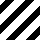
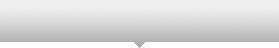
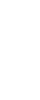
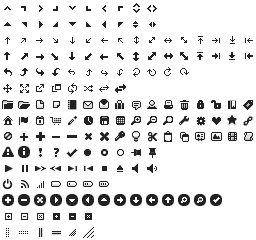
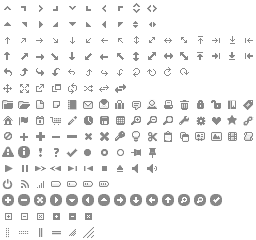
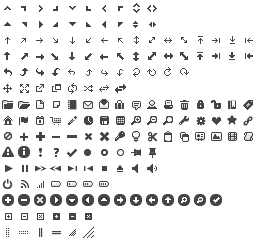
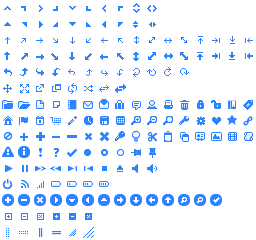
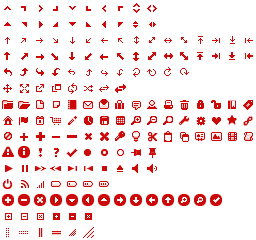
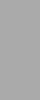
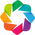
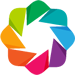
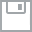
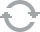
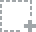
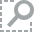
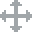
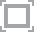
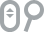

In [51]:
import pandas as pd
from bokeh.plotting import figure, output_notebook,show
output_notebook()
%matplotlib inline 
import numpy as np
#percent means ipython magic. 

In [39]:
wine_df.describe().T

,count,unique,top,freq
Color,30,3,R,16
Consumed In,30,3,2015,20
Country,30,7,US,11
Grape,30,14,,12
Name,30,20,,9
Price,30,17,,6
Region,30,19,Oregon,3
Score,30,8,3,10
Vintage,30,5,2012,14
Vinyard,30,27,Truro Vineyards,2


In [53]:
wine_df[wine_df.Grape ==""]

wine_df.replace('', np.nan, inplace=True)

wine_df

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,NaN,NaN,NaN,Portugal,4,2013,Vinho Verde
1,W,2015,France,NaN,NaN,17.8,France,3,2013,Peyruchet
2,W,2015,Oregon,NaN,NaN,20,Oregon,3,2013,Abacela
3,W,2015,Spain,chardonay,NaN,7,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6,NaN,3,2012,Heartland
5,R,2015,US,cab,NaN,13,California,3.5,2012,Crow Canyon
6,R,2015,US,NaN,#14,21,Oregon,2.5,2013,Abacela
7,R,2015,France,"merlot, cab",NaN,12,Bordeaux,3.5,2012,David Beaulieu
8,R,2015,France,"merlot, cab",NaN,11.99,Medoc,3.5,2011,Chantemerle
9,R,2015,US,merlot,NaN,13,Washington,4,2011,Hyatt


In [63]:
pd.get_dummies(wine_df.Color)

,P,R,W
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [65]:
wine_df.join(pd.get_dummies(wine_df.Color)).head()

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard,P,R,W
0,W,2015,Portugal,NaN,NaN,NaN,Portugal,4,2013,Vinho Verde,0,0,1
1,W,2015,France,NaN,NaN,17.8,France,3,2013,Peyruchet,0,0,1
2,W,2015,Oregon,NaN,NaN,20,Oregon,3,2013,Abacela,0,0,1
3,W,2015,Spain,chardonay,NaN,7,Spain,2.5,2012,Ochoa,0,0,1
4,R,2015,US,"chiraz, cab",Spice Trader,6,NaN,3,2012,Heartland,0,1,0


In [55]:
dummies_wine = pd.get_dummies(wine_df.Color)
wine_df2 = pd.concat([wine_df,dummies_wine])
wine_df2.head()

,Color,Consumed In,Country,Grape,Name,P,Price,R,Region,Score,Vintage,Vinyard,W
0,W,2015,Portugal,NaN,NaN,NaN,NaN,NaN,Portugal,4,2013,Vinho Verde,NaN
1,W,2015,France,NaN,NaN,NaN,17.8,NaN,France,3,2013,Peyruchet,NaN
2,W,2015,Oregon,NaN,NaN,NaN,20,NaN,Oregon,3,2013,Abacela,NaN
3,W,2015,Spain,chardonay,NaN,NaN,7,NaN,Spain,2.5,2012,Ochoa,NaN
4,R,2015,US,"chiraz, cab",Spice Trader,NaN,6,NaN,NaN,3,2012,Heartland,NaN


In [59]:
wine_df['Score'].astype(float)
wine_df['Price'].astype(float)

0        NaN
1      17.80
2      20.00
3       7.00
4       6.00
5      13.00
6      21.00
7      12.00
8      11.99
9      13.00
10     12.00
11     22.00
12      7.00
13     15.00
14     12.00
15     13.00
16     13.00
17     14.00
18     14.50
19     11.00
20       NaN
21     10.00
22     10.00
23       NaN
24       NaN
25       NaN
26       NaN
27     35.00
28     15.00
29    200.00
Name: Price, dtype: float64

In [62]:
# prepare some data
x = wine_df.Price
y = wine_df.Score

# create a new plot with a title and axis labels
p = figure(title="Price vs Rating", x_axis_label='Price ($)', y_axis_label='Rating')

# add a line renderer with legend and line thickness
p.scatter(x, y, line_width=2, line_color='green')

# show the results
show(p)

In [61]:
# prepare some data
x = wine_df[wine_df.Price < 100].Price
y = wine_df[wine_df.Price < 100].Score

# create a new plot with a title and axis labels
p = figure(title="Wine less than $100 vs Rating", x_axis_label='Price ($)', y_axis_label='Rating')

# add a line renderer with legend and line thickness
p.scatter(x, y, line_width=2, line_color='green')

# show the results
show(p)

## Kimono Labs



Web scraping with the Kimono Labs API

https://www.kimonolabs.com/

Kimono labs has undergone a bit of a redesign in recent months and now encourages crawling for all the data you'd want ahead of time and extracting the batch in a series of calls. To create an api, follow the kimono labs walkthrough. To generate a large amount of data like we will here, a series of screenshot walkthroughs have been added.

After creating an API from an advanced search query as walked through in class, navigate to the Crawl Setup tab from the API management page in kimono.

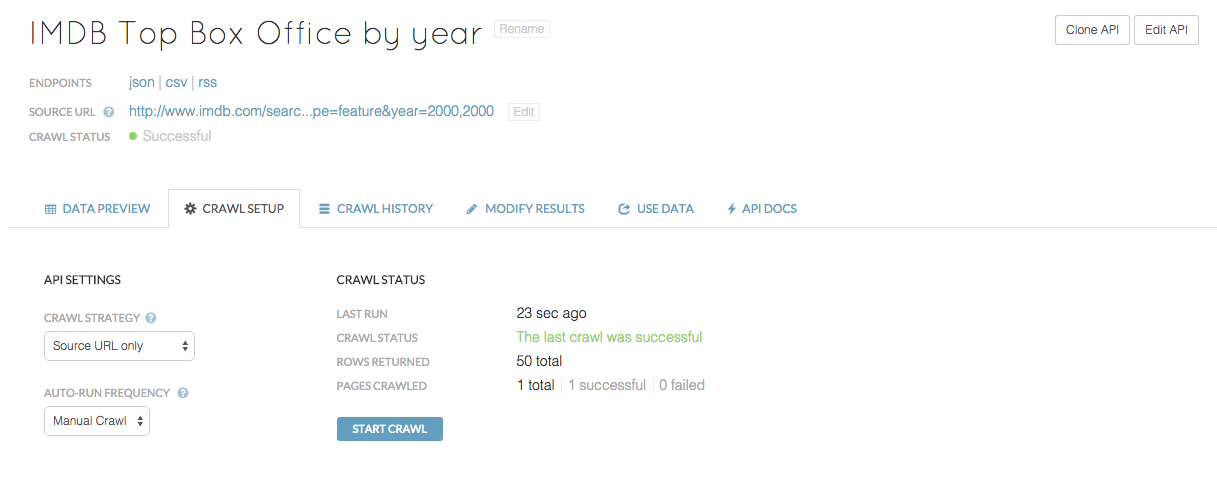

In [66]:
from IPython.display import Image
Image(filename='KL_Crawl_Setup.png') 

Change the crawl strategy to Generated URL List

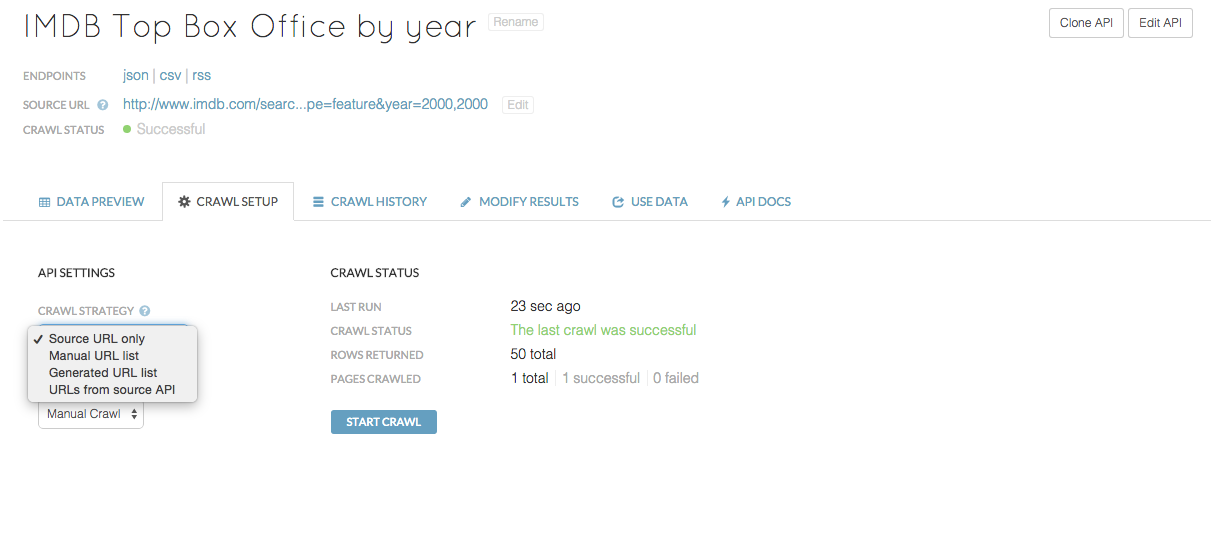

In [67]:
from IPython.display import Image
Image(filename='KL_Generated_URL_List.png') 

From here you can automatically generate a list of pages to extract data from, with the caveat that the pages you are navigating all have roughly the same structure. Here we are going to look for the top boxoffice_gross_us from 1990 to 2014. 

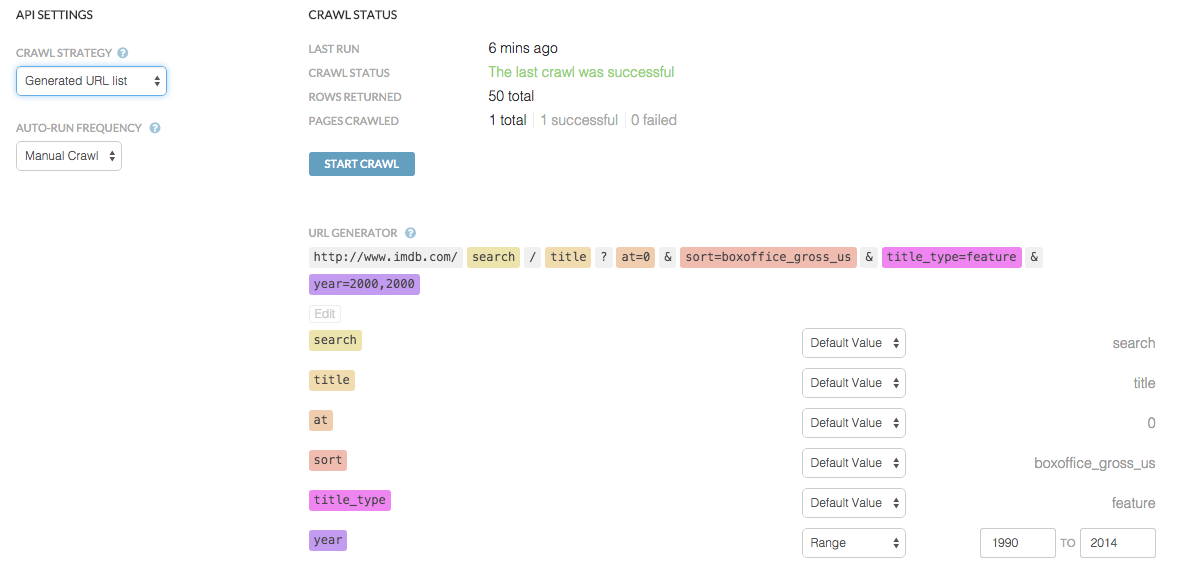

In [68]:
from IPython.display import Image
Image(filename='KL_Parameter_range.png') 

In [1]:
#After you let the data crawl the page, you can update the data here.

import json
import urllib
# urlopen is a different kind of get request

results = json.load(urllib.urlopen("https://www.kimonolabs.com/api/eb81bu78?apikey=4WrTjTsFDGmHCLnYrAXeSLIjJYcfrG7j"))
results

{u'count': 1250,
 u'frequency': u'Manual Crawl',
 u'lastrunstatus': u'success',
 u'name': u'IMDB Top Box Office by year',
 u'newdata': True,
 u'results': {u'collection1': [{u'description': u'An 8-year old troublemaker must protect his home from a pair of burglars when he is accidentally left home alone by his family during Christmas vacation.',
    u'genre': [{u'href': u'http://www.imdb.com/genre/comedy',
      u'text': u'Comedy'},
     {u'href': u'http://www.imdb.com/genre/family', u'text': u'Family'}],
    u'index': 1,
    u'rating': u'7.4',
    u'runtime': u'103 mins.',
    u'sales': u'$286M',
    u'title': {u'href': u'http://www.imdb.com/title/tt0099785/',
     u'text': u'Home Alone'},
    u'url': u'http://www.imdb.com/search/title?at=0&sort=boxoffice_gross_us&title_type=feature&year=1990',
    u'year': u''},
   {u'description': u'After an accident leaves a young man dead, his spirit stays behind to warn his lover of impending danger, with the help of a reluctant psychic.',
    u'g

In [70]:
results['results']['collection1'][0]

{u'description': u'An 8-year old troublemaker must protect his home from a pair of burglars when he is accidentally left home alone by his family during Christmas vacation.',
 u'genre': [{u'href': u'http://www.imdb.com/genre/comedy', u'text': u'Comedy'},
  {u'href': u'http://www.imdb.com/genre/family', u'text': u'Family'}],
 u'index': 1,
 u'rating': u'7.4',
 u'runtime': u'103 mins.',
 u'sales': u'$286M',
 u'title': {u'href': u'http://www.imdb.com/title/tt0099785/',
  u'text': u'Home Alone'},
 u'url': u'http://www.imdb.com/search/title?at=0&sort=boxoffice_gross_us&title_type=feature&year=1990',
 u'year': u''}

In [2]:
your_key = "4WrTjTsFDGmHCLnYrAXeSLIjJYcfrG7j"
your_endpoint = "eb81bu78"
import json
import urllib
import pandas as pd

def getMovies(api_key=your_key,endpoint=your_endpoint):
    """
    Creates list of top 50 movies by gross box office
    sales for a with ratings and sales
    """
    
    movies, ratings, sales, years = [], [], [], []
    #Remember to replace this link with the link to your specifc API
    url = "https://www.kimonolabs.com/api/{}?".format(endpoint) + \
            "apikey={}".format(api_key)
    data = json.load(urllib.urlopen(url))
    
    # Iterate through json object to collect data
    for n in xrange(data['count']):
        n_title = data['results']['collection1'][n]['title']['text']
        n_rating = float(data['results']['collection1'][n]['rating'])
        n_sales = float(data['results']['collection1'][n]['sales'][1:-1])
        n_year = int(data['results']['collection1'][n]['url'][-4:])
        movies.append(n_title)
        ratings.append(n_rating)
        sales.append(n_sales)
        years.append(n_year)
    data = pd.DataFrame({'movie':movies,'rating':ratings,'sales_in_M':sales,'year':years})
    
    return data
movies = getMovies()
movies.head()

,movie,rating,sales_in_M,year
0,Home Alone,7.4,286,1990
1,Ghost,7.0,218,1990
2,Dances with Wolves,8.0,184,1990
3,Pretty Woman,6.9,178,1990
4,Total Recall,7.5,119,1990


Note a few things: The function we wrote relies on extracting pieces of a string and converting them to numeric types. Here, the year can be extracted from the url used to generate the movies, so we use the slice `[-4:]` to identify that. Similarly, the gross cost comes out as $##M, so we know we never want the first or last value. Thus the slice `[1:-1]` is correct.

###Exercise 2.1
Build your own api via kimono at https://www.kimonolabs.com/. Create the api we created in class to call the data.

What were the average sales in 1995?
What was the average rating?

###Bonus
What were the average sales for the 90s? How does that differ from the 2000s?